In [50]:
#setup
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#loading data
m = MPRester("HXCStrOWivVlWhD5FZf")
mat = m.get_structure_by_material_id("mp-11520")

In [52]:
#band gap
bandstructure = m.get_bandstructure_by_material_id("mp-11520")
gap = bandstructure.get_band_gap()
print(gap)

{'direct': False, 'energy': 0.2945000000000002, 'transition': '\\Gamma-X'}


-> dispertion maximale dans la bande de valence : 1.2271970167725654  de direction gamma-X (flèche verte de la bande de valence)
-> dispertion minimale dans la bande de valence : 0.30078313081863983  de direction W-K et W-L (flèches bleues de la bande de valence)
-> dispertion maximale dans la bande de conduction : 3.090830944777181  de direction X-W (flèche verte de la bande de conduction)
-> dispertion minimale dans la bande de conduction : 0.15554784765192542  de direction W-L (flèche jaune de la bande de conduction)


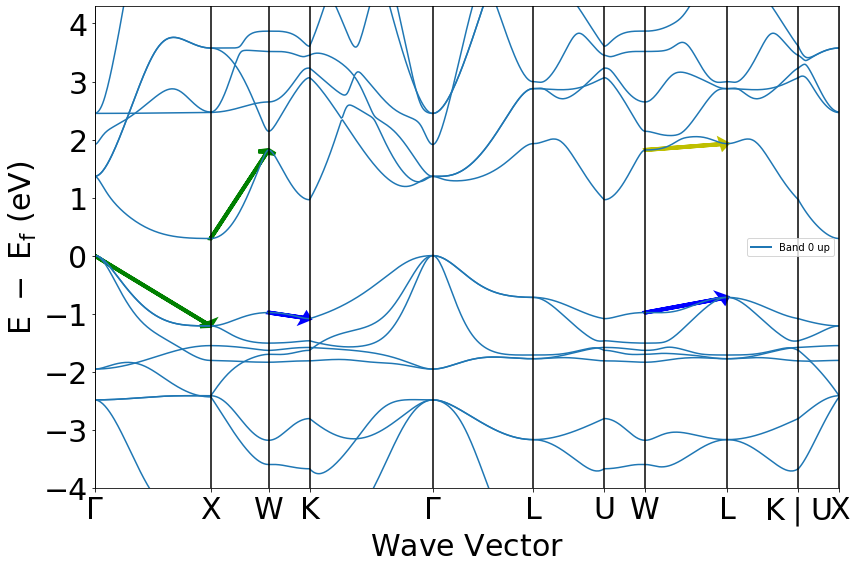

In [53]:
#dispersion
plot = BSPlotter(bandstructure)
data = plot.bs_plot_data()
p = plot.get_plot()
d = data.get("ticks").get("distance")
e = data.get("energy").get('1')
#getting the bands index (last valence band and first conduction one) -> 15 - 16
"""
vbm = bandstructure.get_vbm()
print("Index vbm :" , vbm['band_index'])   
cbm = bandstructure.get_cbm()
print("Index cbm :" ,cbm['band_index'])
"""
Val_index = 15
Con_index = 16

#slope computing

branch = np.unique(d) #get rid of redundant data
dv = np.zeros(10)
dc = np.zeros_like(dv)

for i in range(0, len(dv)):
    dd = branch[i+1]-branch[i]
    
    dv[i] = abs(((e[i][Val_index])[-1] - (e[i][Val_index])[0])/(dd) )
    dc[i] = abs(((e[i][Con_index])[-1] - (e[i][Con_index])[0])/(dd) )
    
#extremum values
Mv = np.max(dv) #max slope for the valence band dispersion -> index 0
mv = np.min(dv) #min -> index 2 and 7
Mc = np.max(dc) #conduction ->  index 1
mc = np.min(dc) #... -> index 7

#plotting
    #valence band
plt.arrow(branch[0], (e[0][Val_index])[0],branch[1] - branch[0], (e[0][Val_index])[-1] - (e[0][Val_index])[0], head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
plt.arrow(branch[2], (e[2][Val_index])[0],branch[3] - branch[2], (e[2][Val_index])[-1] - (e[2][Val_index])[0], head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)
plt.arrow(branch[7], (e[7][Val_index])[0],branch[8] - branch[7], (e[7][Val_index])[-1] - (e[7][Val_index])[0], head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)
    #conduction band
plt.arrow(branch[1], (e[1][Con_index])[0],branch[2] - branch[1], (e[1][Con_index])[-1] - (e[1][Con_index])[0], head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)
plt.arrow(branch[7], (e[7][Con_index])[0],branch[8] - branch[7], (e[7][Con_index])[-1] - (e[7][Con_index])[0], head_width=0.15, head_length=0.05, linewidth=4, color='y', length_includes_head=True)

#text
print("-> dispertion maximale dans la bande de valence :", Mv, " de direction gamma-X (flèche verte de la bande de valence)")
print("-> dispertion minimale dans la bande de valence :", mv, " de direction W-K et W-L (flèches bleues de la bande de valence)")
print("-> dispertion maximale dans la bande de conduction :", Mc, " de direction X-W (flèche verte de la bande de conduction)")
print("-> dispertion minimale dans la bande de conduction :", mc, " de direction W-L (flèche jaune de la bande de conduction)")


In [54]:
#effective mass - conduction band
#on part de la formule de la masse effective, et si la dispersion est supposée parabolique
#on peut approximer la formule par une expression simplifiée (E = ((hbar*k)**2/2meff)+Ak +B)
#il faut alors déterminer A et B grâce à un max/min et un point voisin et la dérivée seconde

#constants
hbar = 1.054571818*10**(-34)
A = 10**(-10)
EV = 1.602176563*10**(-19)
distance = data.get('distances')
#interest points
maxp = (branch[0], e[0][Con_index][0]) #branch gamma
voisin = (branch[1], e[0][Con_index][0]) #branch X
print("point max : ", maxp)
print("voisin : ", voisin)
#computing second derivatives
a = 2*((e[1][Con_index][0] - e[0][Con_index][0])/(branch[1]-branch[0])**2) 
sec_dev = 2*a*(A**2)*EV
print("dérivée seconde f''(k) = ", a, "[eV.A**2] = ", sec_dev, "[J.m**2]")
#calcul de meff par la formule citée plus haut
meff = hbar**2/sec_dev
print("Masse effective (bande de conduction) : meff = ", meff, "[kg]")

point max :  (0.0, 1.3655999999999997)
voisin :  (0.9873720221278561, 1.3655999999999997)
dérivée seconde f''(k) =  -2.1973456632875803 [eV.A**2] =  -7.041071445058102e-39 [J.m**2]
Masse effective (bande de conduction) : meff =  -1.5794779643947327e-30 [kg]


In [55]:
#effective mass - valence band

#interest points
maxp = (branch[0], e[0][Val_index][0]) #branch gamma
voisin = (branch[1], e[0][Val_index][0]) #branch X
print("point max : ", maxp)
print("voisin : ", voisin)

#computing second derivatives
a = 2*((e[1][Val_index][0] - e[0][Val_index][0])/(branch[1]-branch[0])**2) 
sec_dev = 2*a*(A**2)*EV
print("dérivée seconde f''(k) = ", a, "[eV.A**2] = ", sec_dev, "[J.m**2]")
#calcul de meff par la formule citée plus haut
meff = hbar**2/sec_dev
print("Masse effective (bande de conduction) : meff = ", meff, "[kg]")

point max :  (0.0, 0.0)
voisin :  (0.9873720221278561, 0.0)
dérivée seconde f''(k) =  -2.485784464761052 [eV.A**2] =  -7.965331220219315e-39 [J.m**2]
Masse effective (bande de conduction) : meff =  -1.3962027297707328e-30 [kg]
